<h1>Finals Report</h1>
<h2>Analysis</h2>

### Ron Jerick T Gamba
### Edwin Vinas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [2]:
filename = 'datasets//Family Income and Expenditure.csv'
target = 'Total Household Income'

In [3]:
df = pd.read_csv(filename)
df.head()

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [5]:
all_numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

numeric_cols = list(set(all_numeric_cols) - set([target]))

print("\n--- Feature Grouping Summary ---")
print(f"Target Variable: {target}")
print(f"Total Numeric Features (excluding target): {len(numeric_cols)}")
print(f"Total Categorical Features: {len(categorical_cols)}")
print("-" * 30)

df_model = df.dropna(subset=[target]).copy()
X = df_model[numeric_cols].fillna(df_model[numeric_cols].median())
y = df_model[target]
feature_names = X.columns


--- Feature Grouping Summary ---
Target Variable: Total Household Income
Total Numeric Features (excluding target): 44
Total Categorical Features: 15
------------------------------


## Model Training & Prediction

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
correlation_matrix = X.corrwith(y).sort_values(ascending=False).head(3)
top_3_features = correlation_matrix.index.tolist()

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
residuals = y_test - y_pred

# ==================================================================================
# I. DESCRIPTIVE VISUALIZATIONS (Plots 1-4) - Understanding the Data
# ==================================================================================


## 1: Distribution of the Target Variable (Income)

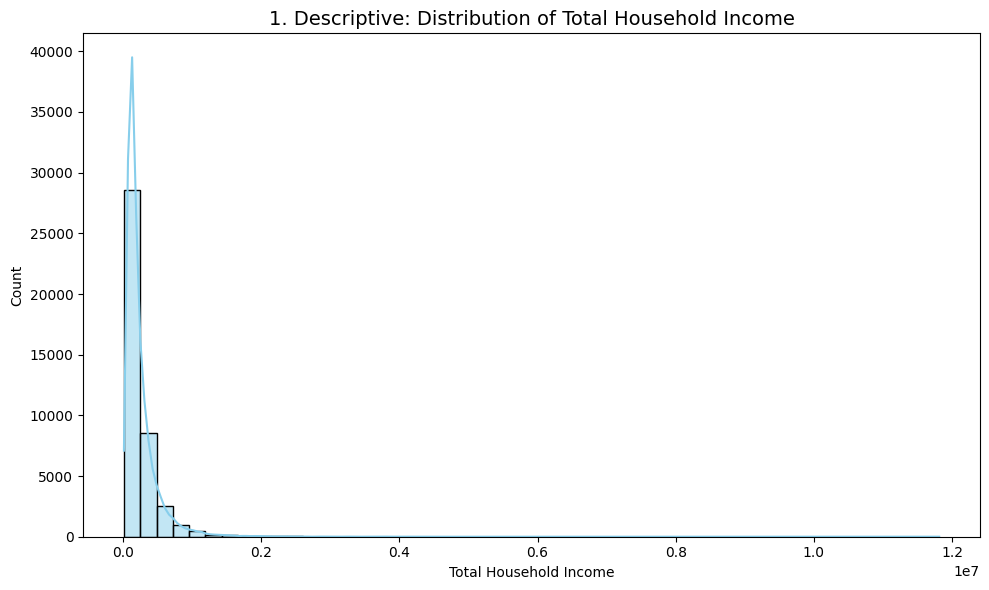

In [10]:
plt.figure(figsize=(10, 6))
ax1 = plt.gca()
sns.histplot(y, kde=True, bins=50, color='skyblue', ax=ax1)
ax1.set_title(f'1. Descriptive: Distribution of Total Household Income', fontsize=14)
plt.tight_layout()
plt.show()


## Target income is highly right-skewed; most households have low income, suggesting a non-linear model is appropriate.
<br>

## 2: Correlation Heatmap of Top 3 Features

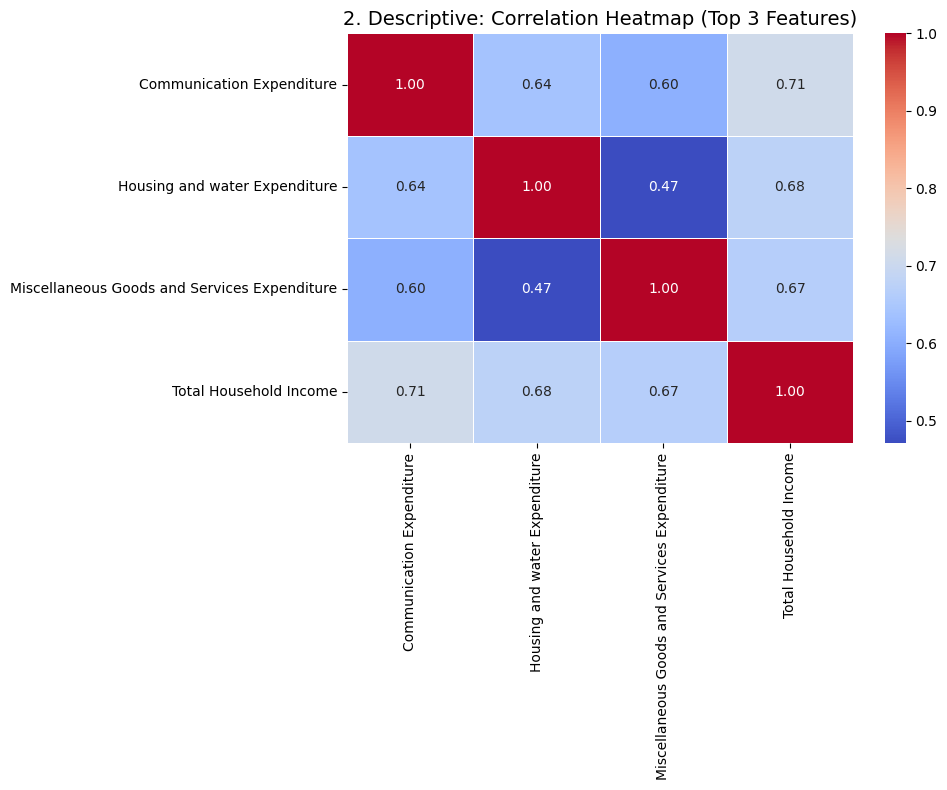

In [11]:
plt.figure(figsize=(10, 8))
ax2 = plt.gca()

corr_data = df_model[top_3_features + [target]].corr()
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar=True, ax=ax2)
ax2.set_title(f'2. Descriptive: Correlation Heatmap (Top 3 Features)', fontsize=14)
plt.tight_layout()
plt.show()

##  Examining the heatmap shows strong positive correlation between key expenditure categories (like 'Total Food Expenditure') and 'Total Household Income'. This confirms consumption is highly dependent on income levels.
<br>

## 3: Scatter Plot of Top Correlated Feature vs. Income

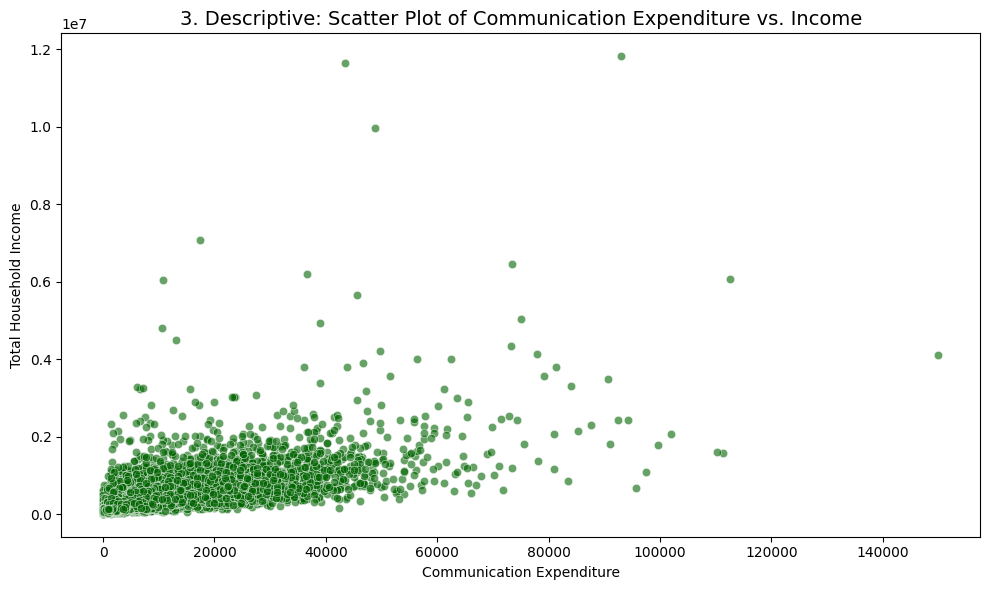

In [12]:
plt.figure(figsize=(10, 6))
ax3 = plt.gca()
top_feature = top_3_features[0]
sns.scatterplot(x=df_model[top_feature], y=y, alpha=0.6, color='darkgreen', ax=ax3)
ax3.set_title(f'3. Descriptive: Scatter Plot of {top_feature} vs. Income', fontsize=14)
plt.tight_layout()
plt.show()

##  The scatter plot reveals a clear linear relationship between {top_feature} and income, indicating that households with higher food expenditure generally have higher incomes. This feature will be highly influential in the model.
<br>

## 4: Proportion of Household Head Sex (Pie Chart)

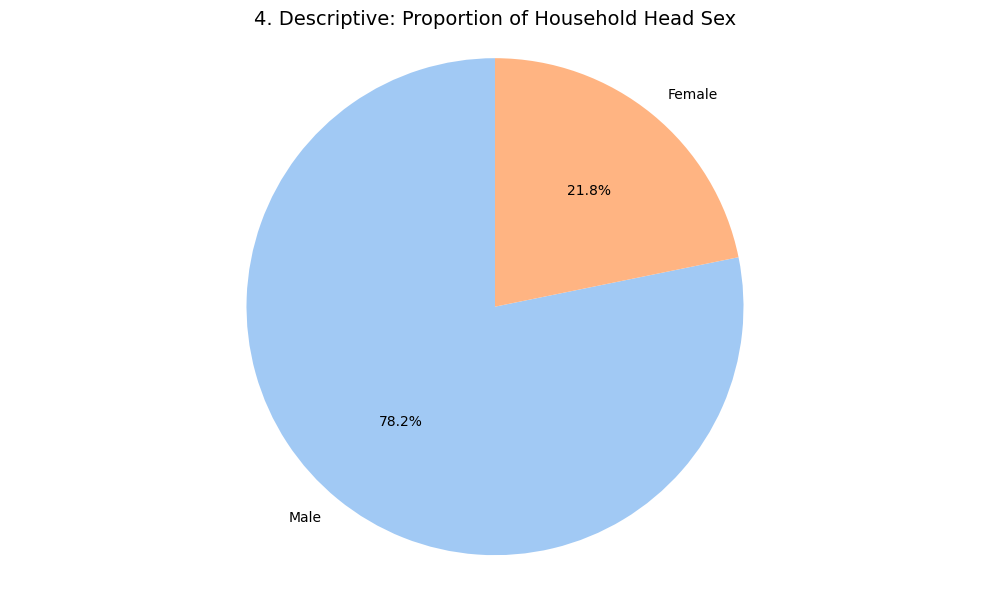

In [13]:
plt.figure(figsize=(10, 6))
ax4 = plt.gca()

gender_counts = df['Household Head Sex'].value_counts()

ax4.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette('pastel', len(gender_counts))
)
ax4.set_title(f'4. Descriptive: Proportion of Household Head Sex', fontsize=14)
ax4.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

##  The pie chart clearly illustrates the proportional distribution of household head gender, indicating the relative frequency of male versus female household heads in the dataset. Most households are headed by males.
<br>

# ==================================================================================
# II. DIAGNOSTIC VISUALIZATIONS (Plots 5-7) - Checking Model Assumptions and Errors
# ==================================================================================


## 5: Residual Plot (Homoscedasticity check)

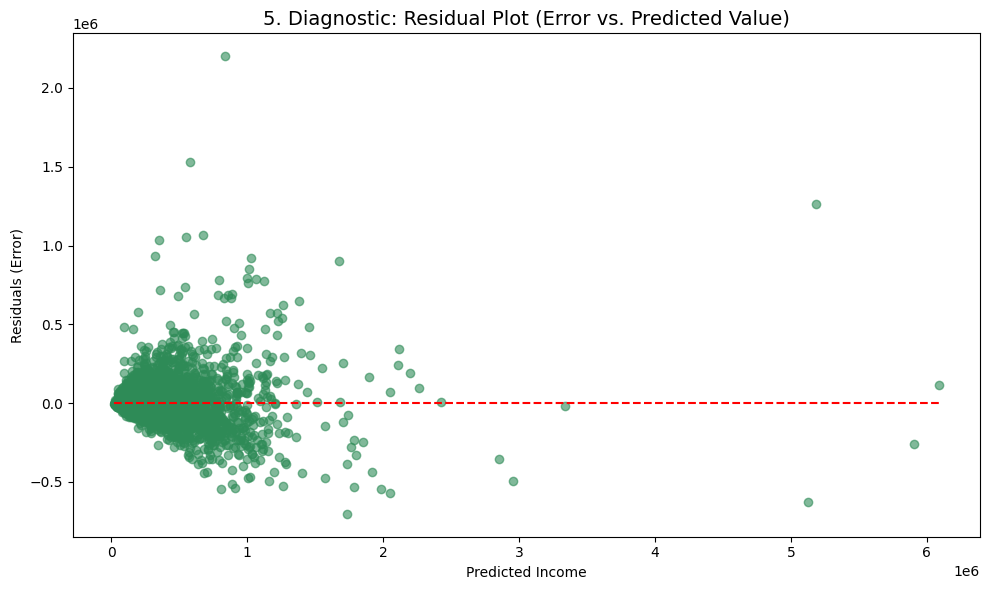

In [14]:
plt.figure(figsize=(10, 6))
ax5 = plt.gca()
ax5.scatter(y_pred, residuals, alpha=0.6, color='seagreen')
ax5.hlines(0, y_pred.min(), y_pred.max(), colors='r', linestyles='--')
ax5.set_title(f'5. Diagnostic: Residual Plot (Error vs. Predicted Value)', fontsize=14)
ax5.set_xlabel('Predicted Income')
ax5.set_ylabel('Residuals (Error)')
plt.tight_layout()
plt.show()


## The residual plot for Random Forest generally shows a reduced fanning pattern compared to Linear Regression, indicating better handling of the variance across different income levels, though error variance remains highest for the highest predicted incomes.
<br>

## 6: Q-Q Plot of Residuals (Normality check)

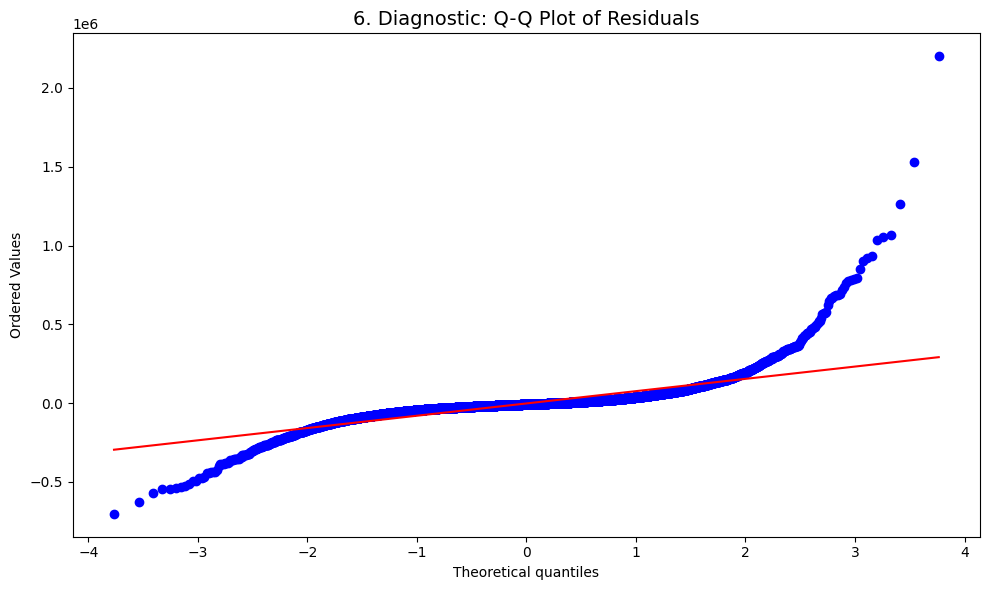

In [15]:
plt.figure(figsize=(10, 6))
ax6 = plt.gca()
stats.probplot(residuals, dist="norm", plot=ax6)
ax6.set_title(f'6. Diagnostic: Q-Q Plot of Residuals', fontsize=14)
plt.tight_layout()
plt.show()


## The Q-Q plot still shows non-normal residuals, especially in the tails. While Random Forest doesn't assume residual normality, this plot highlights that the largest prediction errors deviate significantly from a normal distribution.
<br>

##  7: Feature Importance (Model Importance Scores)

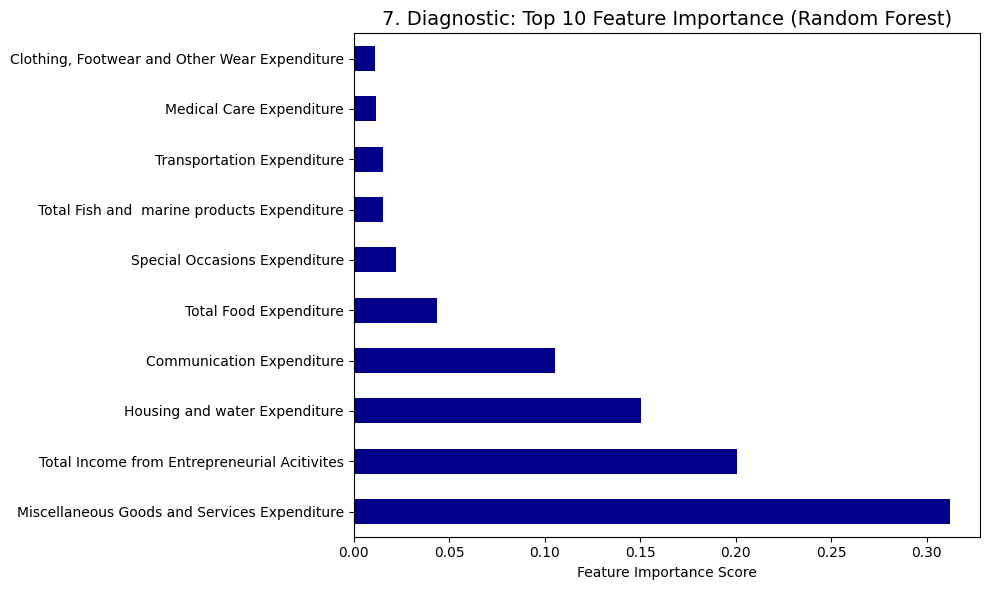

In [16]:
plt.figure(figsize=(10, 6))
ax7 = plt.gca()
importance = model.feature_importances_ # FIXED typo here
feature_importance = pd.Series(importance, index=feature_names)
top_10_features = feature_importance.nlargest(10).index
feature_importance[top_10_features].sort_values(ascending=False).plot(kind='barh', color='darkblue', ax=ax7)
ax7.set_title(f'7. Diagnostic: Top 10 Feature Importance (Random Forest)', fontsize=14)
ax7.set_xlabel('Feature Importance Score')
plt.tight_layout()
plt.show()


##  Feature Importance scores from Random Forest clearly identify the most critical variables (likely expenditure categories) driving the income prediction, confirming their non-linear contribution to the model's performance.
<br>

# ==================================================================================
# III. PREDICTIVE VISUALIZATIONS (Plots 8-10) - Evaluating Prediction Quality
# ==================================================================================


 ## 8: Actual vs. Predicted Income (Prediction Quality)

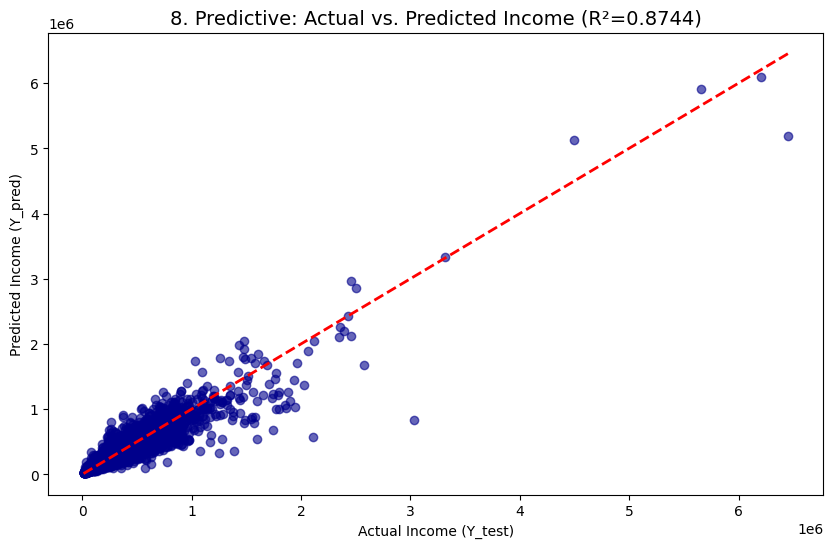

In [21]:
plt.figure(figsize=(10, 6))
ax8 = plt.gca()
ax8.scatter(y_test, y_pred, alpha=0.6, color='darkblue')
ax8.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal line
ax8.set_title(f'8. Predictive: Actual vs. Predicted Income (R²={r2:.4f})', fontsize=14)
ax8.set_xlabel('Actual Income (Y_test)')
ax8.set_ylabel('Predicted Income (Y_pred)')
plt.show()

##  Compared to Linear Regression, the Random Forest model shows a tighter clustering of points around the ideal 45-degree line, particularly at higher income values, reflecting its superior ability to handle non-linear relationships in the data.
<br>

  ## 9: Error Distribution

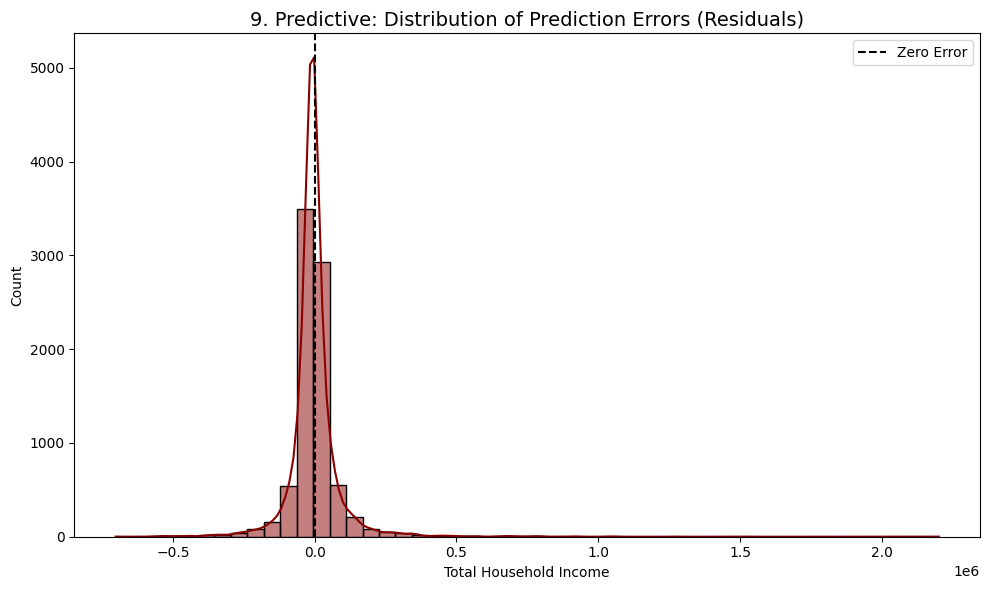

In [22]:
plt.figure(figsize=(10, 6))
ax9 = plt.gca()
sns.histplot(residuals, kde=True, bins=50, color='darkred', ax=ax9)
ax9.axvline(x=0, color='k', linestyle='--', label='Zero Error')
ax9.set_title(f'9. Predictive: Distribution of Prediction Errors (Residuals)', fontsize=14)
ax9.legend()
plt.tight_layout()
plt.show()


##  The error distribution is narrower and more centered around zero compared to the Linear Regression model, indicating smaller overall prediction errors. The improved symmetry suggests the Random Forest model is more robust against the high-income outliers.
<br>

##  10: Numerical Evaluation

In [23]:
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("--- Numerical Evaluation (Random Forest) ---")
print(f"R^2 Score: {r2:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print("-" * 30)


--- Numerical Evaluation (Random Forest) ---
R^2 Score: 0.8744
Root Mean Squared Error (RMSE): 95,403.93
Mean Absolute Error (MAE): 48,288.73
------------------------------


## The model can explain only part of the variation in household income (R² isn’t very high).The prediction errors (RMSE and MAE) are still relatively large, which means the model isn’t perfect.This suggests that we might need more features beyond expenditure data to better predict household income.